In [6]:
import pandas as pd
import warnings
from typing import Dict, Iterator, Any
import matplotlib.pyplot as plt
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
def iterate_dataframes(path: str) -> Iterator[pd.DataFrame]:
    """
    Iterates over all .csv files in path as pd.DataFrame
    """
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
        csvs = [path + x for x in os.listdir(path) if "csv" in x]
    
        for ind,csv in enumerate(csvs):
            print(f"{ind}/{len(csvs)}", end="\r")
            yield pd.read_csv(csv,  lineterminator='\n')

def aggregate_dataframe(df: pd.DataFrame) -> Dict[str, Any]:
    """
    Aggregates dataframe to dict.
    """
    df_la = df.groupby("language").count().reset_index()
    languages = df_la['language'].tolist()
    lang_counts = df_la['username'].tolist()
    unique_user_count = df['userid'].unique().shape[0]
    row_count = df.shape[0]
    duplicated_count = df.duplicated(subset="text", keep=False).sum()
    date = df.iloc[0]['tweetcreatedts'][:10]
    aggregation = {'unique_users': unique_user_count,
                  'row_count': row_count,
                  'text_duplicated_count': duplicated_count,
                  'date':date}
    aggregation = {**dict(zip(languages, lang_counts)), **aggregation}
    return aggregation
    
    
    

In [8]:
path = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2023/"
agg_dicts_2023 = []

for df in iterate_dataframes(path):
    agg = aggregate_dataframe(df)
    agg_dicts_2023.append(agg)
    
    
df_agg_2023 = pd.DataFrame(agg_dicts_2023).fillna(0)

In [9]:
path = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2022/"
agg_dicts_2022 = []

for df in iterate_dataframes(path):
    agg = aggregate_dataframe(df)
    agg_dicts_2022.append(agg)
    
    
df_agg_2022 = pd.DataFrame(agg_dicts_2022).fillna(0)

In [18]:
df_agg_2022.to_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2022_agg.csv")
df_agg_2023.to_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2023_agg.csv")

In [12]:
df_agg_2022['row_count'].sum() + df_agg_2023['row_count'].sum()

70885956

In [19]:
df_agg_2022['date'].

0      2022-05-14
1      2022-09-24
2      2022-05-23
3      2022-03-03
4      2022-09-13
          ...    
306    2022-10-02
307    2022-07-13
308    2022-11-12
309    2022-07-24
310    2022-11-25
Name: date, Length: 311, dtype: object

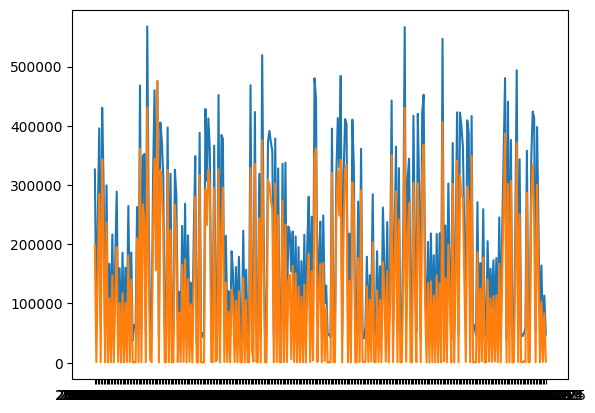

In [16]:

fig, ax = plt.subplots()
ax.plot(df_agg_2022['date'], df_agg_2022['row_count'])
ax.plot(df_agg_2022['date'], df_agg_2022['text_duplicated_count'])

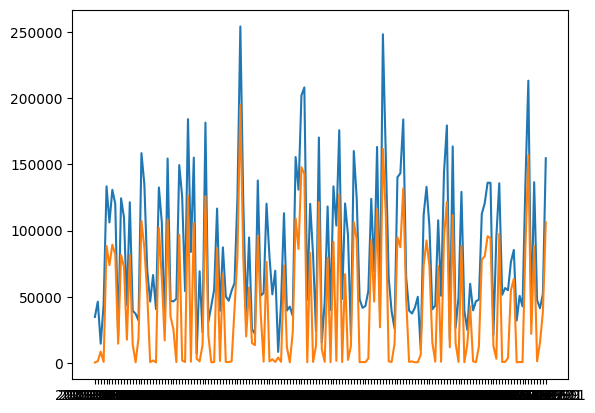

In [17]:
fig, ax = plt.subplots()
ax.plot(df_agg_2023['date'], df_agg_2023['row_count'])
ax.plot(df_agg_2023['date'], df_agg_2023['text_duplicated_count'])